# Групповой проект №1. Первичный анализ данных "Международные авиаперевозки в США"

<img src="https://image.shutterstock.com/z/stock-vector-set-of-vector-tags-with-usa-airport-codes-vector-illustration-for-travelers-famous-american-451061281.jpg" height="400" />

Данные взяты из [отчета по статистике международных авиапассажирских и грузовых перевозок США](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report#TheReports).

Этот же датасет, но в гугл драйв: https://drive.google.com/drive/folders/1P3i89WzfkVmC2L53G9qQxjzWJ3NSanat?usp=sharing

В ноутбуке скачивание данных происходит по ссылке с гугл-драйв, просьба не изменять.


Доступен следующий набор данных:

- **International_Report_Passengers.csv**: данные об общем количестве пассажиров за каждый месяц и год между парой аэропортов, обслуживаемых конкретной авиакомпанией.
Данные о пассажирах и грузоперевозках в США являются конфиденциальными в первые 6 месяцев, после чего они могут быть опубликованы. Количество пассажиров записывается в трех столбцах: «По расписанию», «Чартер» и «Всего»: "Scheduled", "Charter", "Total".

Описание атрибутов доступно по ссылке: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw


## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии.  
Ссылка на шаблон к презентации: [ссылка](https://docs.google.com/presentation/d/1eydwcHaGKznePEbFuRT810cEGLgB3YYqpy-cDeRx_ik/edit?usp=sharing).  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

**Вопросы, на которые нужно ответить в презентации перечислены в ноутбуке.**

Любой хороший data-scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите Екатерине (@poka_katt). 

## Требования к оформлению графиков (в ноутбуке и в презентации)

1. Каждый график необходимо подписывать
2. Оси Х и У всегда подписаны
3. Выбрана подходящая шкала и шаг 
4. Не забывайте про логарифмическую шкалу и всегда используйте при необходимости!


# Итак, приступим

Импортируем необходимые библиотеки

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Загрузим International_Report_Passengers.csv

In [ ]:
url='https://drive.google.com/file/d/1nvi3GFkmZDXSbLrTe_ZmyNAjZGQ74A4D/view?usp=sharing'

url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url2, delimiter=',')
df1.dataframeName = 'International_Report_Passengers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 693122 rows and 16 columns


## Посмотрим на наш датасет

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,07/01/2004,2004,7,14747,SEA,93,16229,YVR,906,19687,QX,1,Passengers,19265,0,19265
1,11/01/2008,2008,11,11697,FLL,33,12010,GUA,127,20416,NK,1,Passengers,3099,0,3099
2,10/01/2002,2002,10,10257,ALB,22,16271,YYZ,936,20206,QK,0,Passengers,33,0,33
3,03/01/2007,2007,3,12889,LAS,85,13165,MAN,493,19541,BD,0,Passengers,3815,0,3815
4,03/01/2009,2009,3,12892,LAX,91,13252,MEX,148,19534,AM,0,Passengers,17993,0,17993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


## Отсортируем данные по дате

In [ ]:
df1.sort_values(by=['Year','Month'], inplace=True)
#Аргумент «inplace = True» означает, что фрейм данных должен сделать изменения постоянными,
#То есть сохранит изменения в загруженной таблице (у нас это df1)

In [ ]:
df1

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
294485,01/01/1990,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,0,Passengers,0,796,796
294617,01/01/1990,1990,1,12892,LAX,91,14228,PPT,823,19508,UT,0,Passengers,1790,0,1790
294655,01/01/1990,1990,1,13495,MSY,72,11032,CUN,148,19556,LR,0,Passengers,1515,0,1515
294671,01/01/1990,1990,1,12173,HNL,2,16232,YWG,926,19523,CP,0,Passengers,2370,0,2370
294762,01/01/1990,1990,1,13303,MIA,33,10846,BZE,106,20144,TX,0,Passengers,6489,0,6489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693117,03/01/2021,2021,3,99999,ZZZ,1,11519,EIS,282,21743,2LQ,1,Passengers,0,16,16
693118,03/01/2021,2021,3,99999,ZZZ,1,11731,FPO,204,21743,2LQ,1,Passengers,0,9,9
693119,03/01/2021,2021,3,99999,ZZZ,1,13605,NAS,204,21743,2LQ,1,Passengers,0,19,19
693120,03/01/2021,2021,3,99999,ZZZ,1,14682,SAQ,204,21743,2LQ,1,Passengers,0,77,77


# Посмотрим на кол-во записей в таблице для 2010-2020 годов

In [ ]:
# 1ый способ:
n_flights = df1.loc[df1['Year']==2010]
print(len(n_flights))

23551


In [ ]:
# 2ой способ
n_flights = df1.query('Year==2010')
print(len(n_flights))

23551


 Согласитесь второй способ (с использованием "query") удобнее и красивее?

In [ ]:
# можно писать несколько условий
df1.query("Year==2020 & Month==3 & carrier=='RV'").head(3)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
671596,03/01/2020,2020,3,11697,FLL,33,16149,YOW,936,21610,RV,0,Passengers,4280,0,4280
671601,03/01/2020,2020,3,11697,FLL,33,16217,YUL,941,21610,RV,0,Passengers,40105,0,40105
671611,03/01/2020,2020,3,11697,FLL,33,16271,YYZ,936,21610,RV,0,Passengers,29844,0,29844


In [ ]:
years_to_check = np.arange(2010, 2022)

for year in years_to_check:
    n_flights = df1.query('Year=='+str(year))
    print(f"Для {year} года в таблице {len(n_flights)} записей.") #Как видите, в методе print() для вывода использован f-string.
                                                                    #Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

Для 2010 года в таблице 23551 записей.
Для 2011 года в таблице 24516 записей.
Для 2012 года в таблице 24070 записей.
Для 2013 года в таблице 24464 записей.
Для 2014 года в таблице 25843 записей.
Для 2015 года в таблице 27234 записей.
Для 2016 года в таблице 28645 записей.
Для 2017 года в таблице 29998 записей.
Для 2018 года в таблице 30667 записей.
Для 2019 года в таблице 30436 записей.
Для 2020 года в таблице 15868 записей.
Для 2021 года в таблице 4183 записей.


В методе print() для вывода использован f-string. Почитать подробнее можно здесь: https://realpython.com/python-f-strings/

In [ ]:
# Проверим пропуски
df1.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

# Задание 1. Пассажирский трафик
Вопрос 1: Постройте график изменения кол-ва перевезенных людей (столбец Total) за январь-декабрь 2019 года и за январь-декабрь 2020. Можно построить в два графика или отразить 2 кривые на одном (второй вариант предпочтительнее, но тогда не забудьте изменить цвет у кривых). Какой вывод можно сделать исходя из графиков?

Ответ:


Вопрос 2: как изменился (в процентах) трафик между США и другими странами в период с января по декабрь 2020 года по сравнению с январем-декабрем 2019 года? (трафик=кол-во перевезенных за месяц людей). Изобразите в виде графика: по оси Х - месяц+год, по оси У - изменение трафика в процентах.

Ответ:

# Задание 2. Загруженность авиакомпаний

Вопрос 1: Нарисуйте топ 5 популярных авиакомпаний (airlineid, carrier) за все года (1990-2021). По оси Х на графике укажите название авикомпании (БЕЗ кода), по оси У - кол-во перевезенных людей за все года.

Ответ:

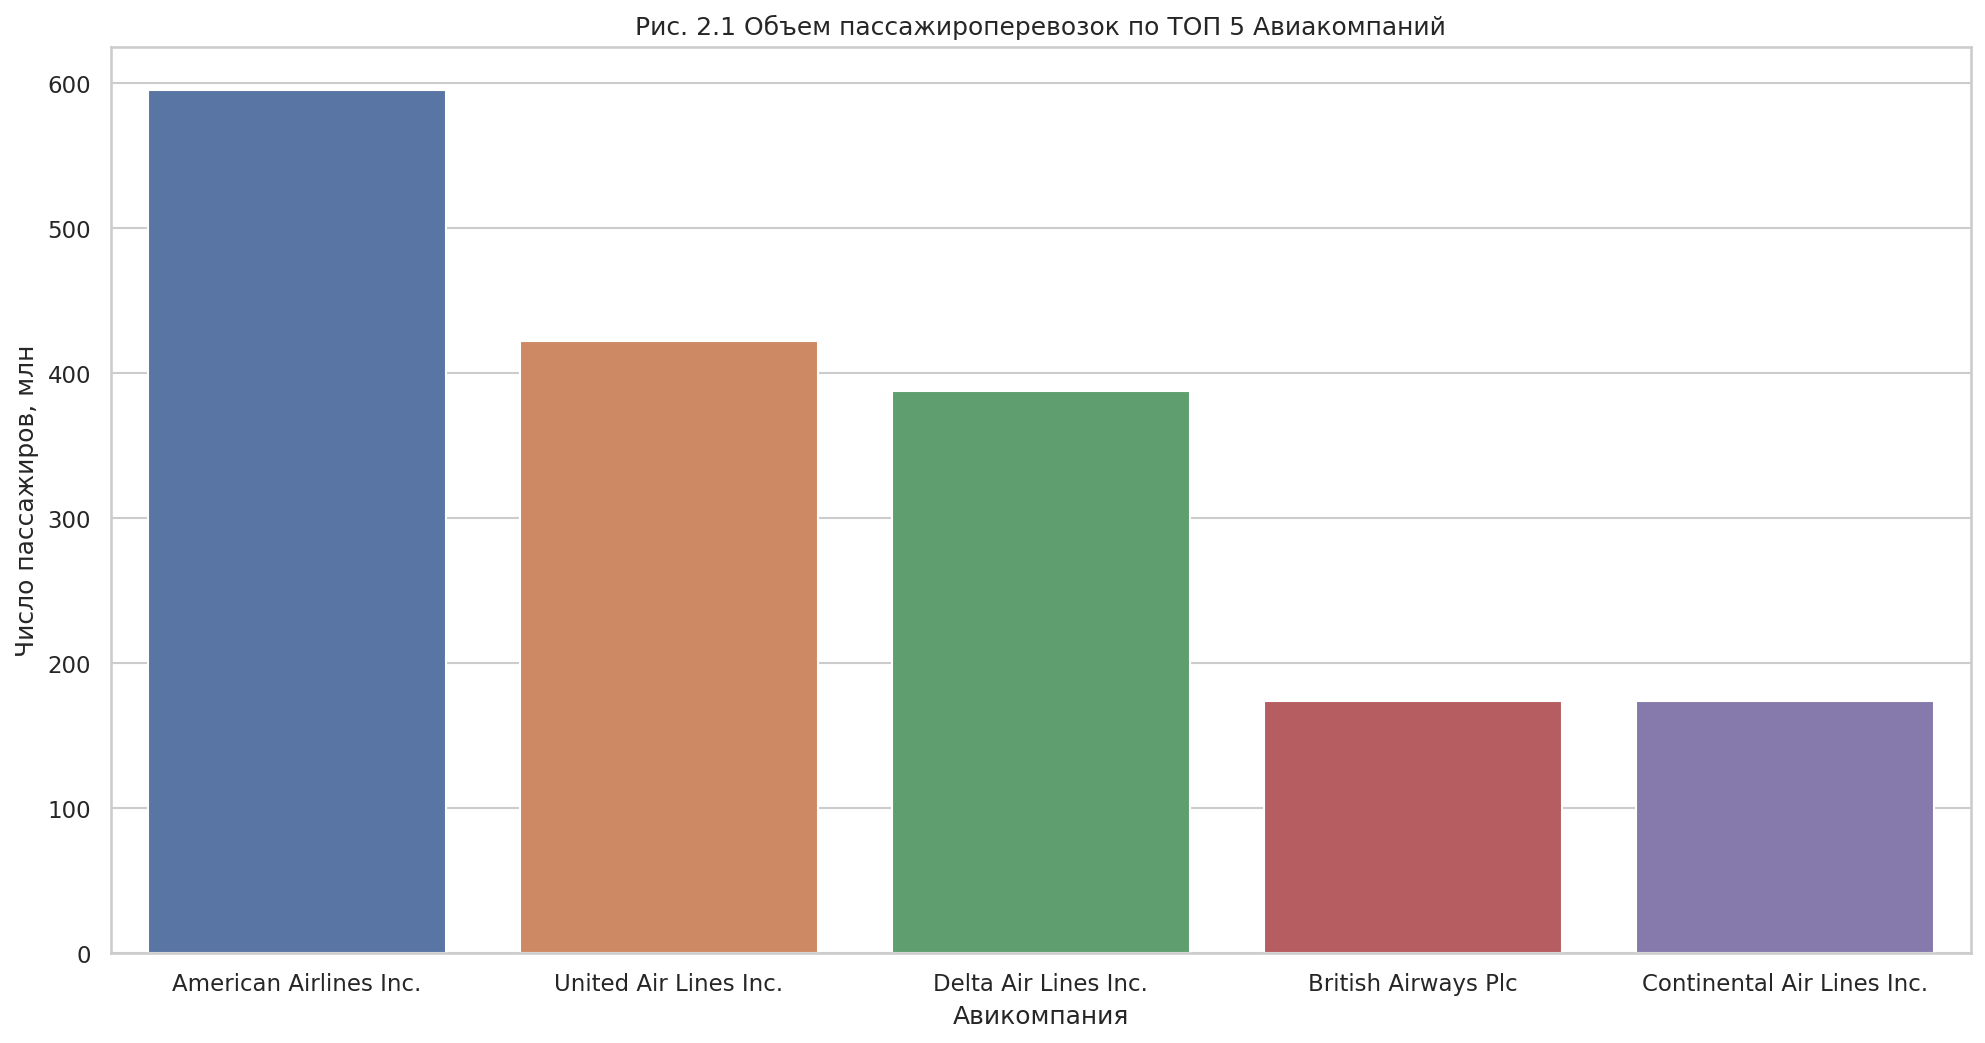

In [ ]:
#Загрузим данные по кодам Авиакомпаний

airlines_url = 'https://raw.githubusercontent.com/beanumber/airlines/master/data-raw/airlines.csv'
airlines = pd.read_csv(airlines_url)
airlines = airlines.rename(columns={"Code": "carrier","Description": "AirCraft",})
airlines.set_index('carrier')

#Новый Датасет с наименованием Авиакомпании

df2 = df1.merge(airlines)[['carrier', 'AirCraft', 'Year', 'Total']]

#Выберем ТОП5 авиакомпаний по объему перевозок за весь период

top5_aircraft_codes = df2[['carrier', 'Total']].groupby(['carrier']).sum() \
.sort_values(by="Total", ascending=False) \
.head(5) \
.drop('Total', axis=1) \
.reset_index()['carrier']

#Выберем по выбранным ТОП5 компаний отдельный Датасет для отрисовки

df2 = df2[df2['carrier'].isin(top5_aircraft_codes)]
df2_1 = df2.drop('carrier', axis=1) 
df2_1 = df2_1[['AirCraft', 'Total']].groupby(['AirCraft']) \
.sum().reset_index().sort_values(by="Total", ascending=False)
df2_1

#Непосредственно отрисовка графика пассажирапотока по ТОП5 Авиакомпаний

f, ax = plt.subplots(figsize=(16, 8), dpi=150)
g = sns.barplot(x="AirCraft", y="Total", data=df2_1)

ylabels = ['{:.0f}'.format(x) for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
g.set(title='Рис. 2.1 Объем пассажироперевозок по ТОП 5 Авиакомпаний')
ax.set(ylabel="Число пассажиров, млн",
       xlabel="Авикомпания")
sns.set_style("darkgrid", { 'grid.color': ".6", 
                            'grid.linestyle': "-"})

Вопрос 2: Какая авиакомпания самая "быстрорастущая", если оценивать рост по кол-ву перевезенных людей? Какая компания теряет клиентов?

Ответ:

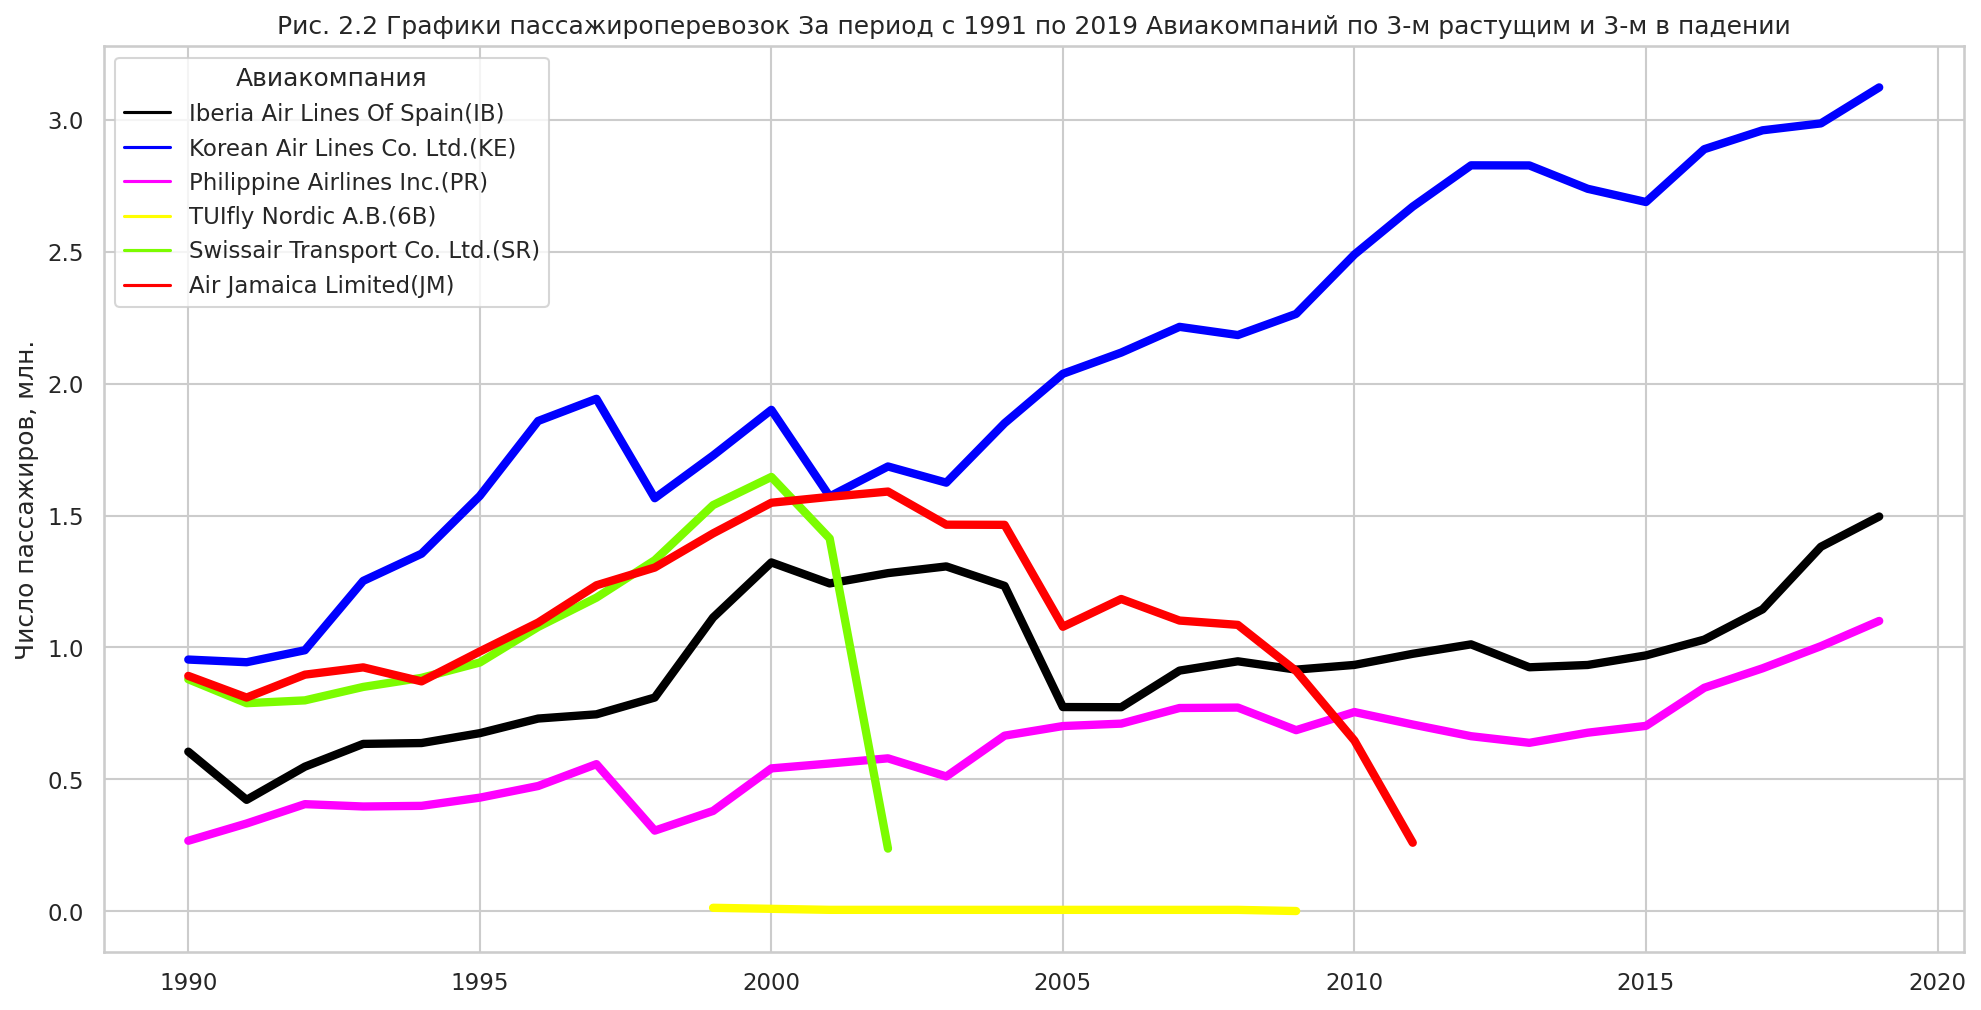

In [ ]:
#Откинем "пандемийные" года 2020-2021, поскольку у всех компаний наблюдалось 
# падение пасссжиропотока и соберем в новый Датасет суммированные данные по годам

df_Not_2020 = df1.query("Year < 2020")
consData = df_Not_2020[['Year', 'carrier','Total']].groupby(['Year', 'carrier']).sum() \
.sort_values(by=["carrier", 'Year'], ascending=True)
consData.reset_index(inplace=True) 

#Пробежимся по всем авиакомпаниям из нового Датасета и соберем в новой колонке 
#"change" изменения в %% пасажиропотока по отношению к предыдущему период с помощью
# функции pct_change()

air_craft_list = consData.carrier.unique()
for c in air_craft_list:
  consData.loc[consData['carrier']==c,['change']] = consData.Total.pct_change().mul(100).round(2)
consData = consData.sort_values('change', ascending=False)

# Добавим поле наименование авиакомпании для наглядности

consData = consData.merge(airlines)[['carrier', 'AirCraft', 'Year', 'Total']] 
consData['AirCraft'] = consData['AirCraft']+'('+consData['carrier']+')'

#Отберем по сто значений с "головы" и "хвоста" получившегося Датасета, 
# отсортированного ранее по размеру изменений


#И возьмём по три компании "сверху" и "снизу"
top100 = consData.head(100).dropna().groupby(by=['carrier']).size().sort_values().tail(3) 
down100 = consData.tail(100).dropna().groupby(by=['carrier']).size().sort_values().tail(3)

# Построим графики по этим компаниям с макисмальным ростом и максимальным падением

colors = [["black"], ["blue"], ["magenta"], ["yellow"], ["lawngreen"], ["red"]]
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')
labels_to_graf = list()
i = 0
for c in top100.index:
  labels_to_graf.append(consData.loc[consData['carrier']==c].AirCraft)
  gx = sns.lineplot(data=consData.loc[consData['carrier']==c], x='Year', y='Total',\
                    linewidth=4, hue = 'AirCraft', palette = colors[i])
  i +=1
for c in down100.index:
  labels_to_graf.append(consData.loc[consData['carrier']==c].AirCraft)
  gx = sns.lineplot(data=consData.loc[consData['carrier']==c], x='Year', y='Total',\
                    linewidth=4, hue = 'AirCraft', palette = colors[i])
  i +=1
ylabels = ['{:.1f}'.format(x) for x in gx.get_yticks()/1000000]
gx.set_yticklabels(ylabels)
gx.set(title='Рис. 2.2 Графики пассажироперевозок За период с 1991 по 2019\
 Авиакомпаний по 3-м растущим и 3-м в падении')
gx.set(ylabel="Число пассажиров, млн.",
       xlabel='')
plt.legend(title='Авиакомпания')
plt.show()

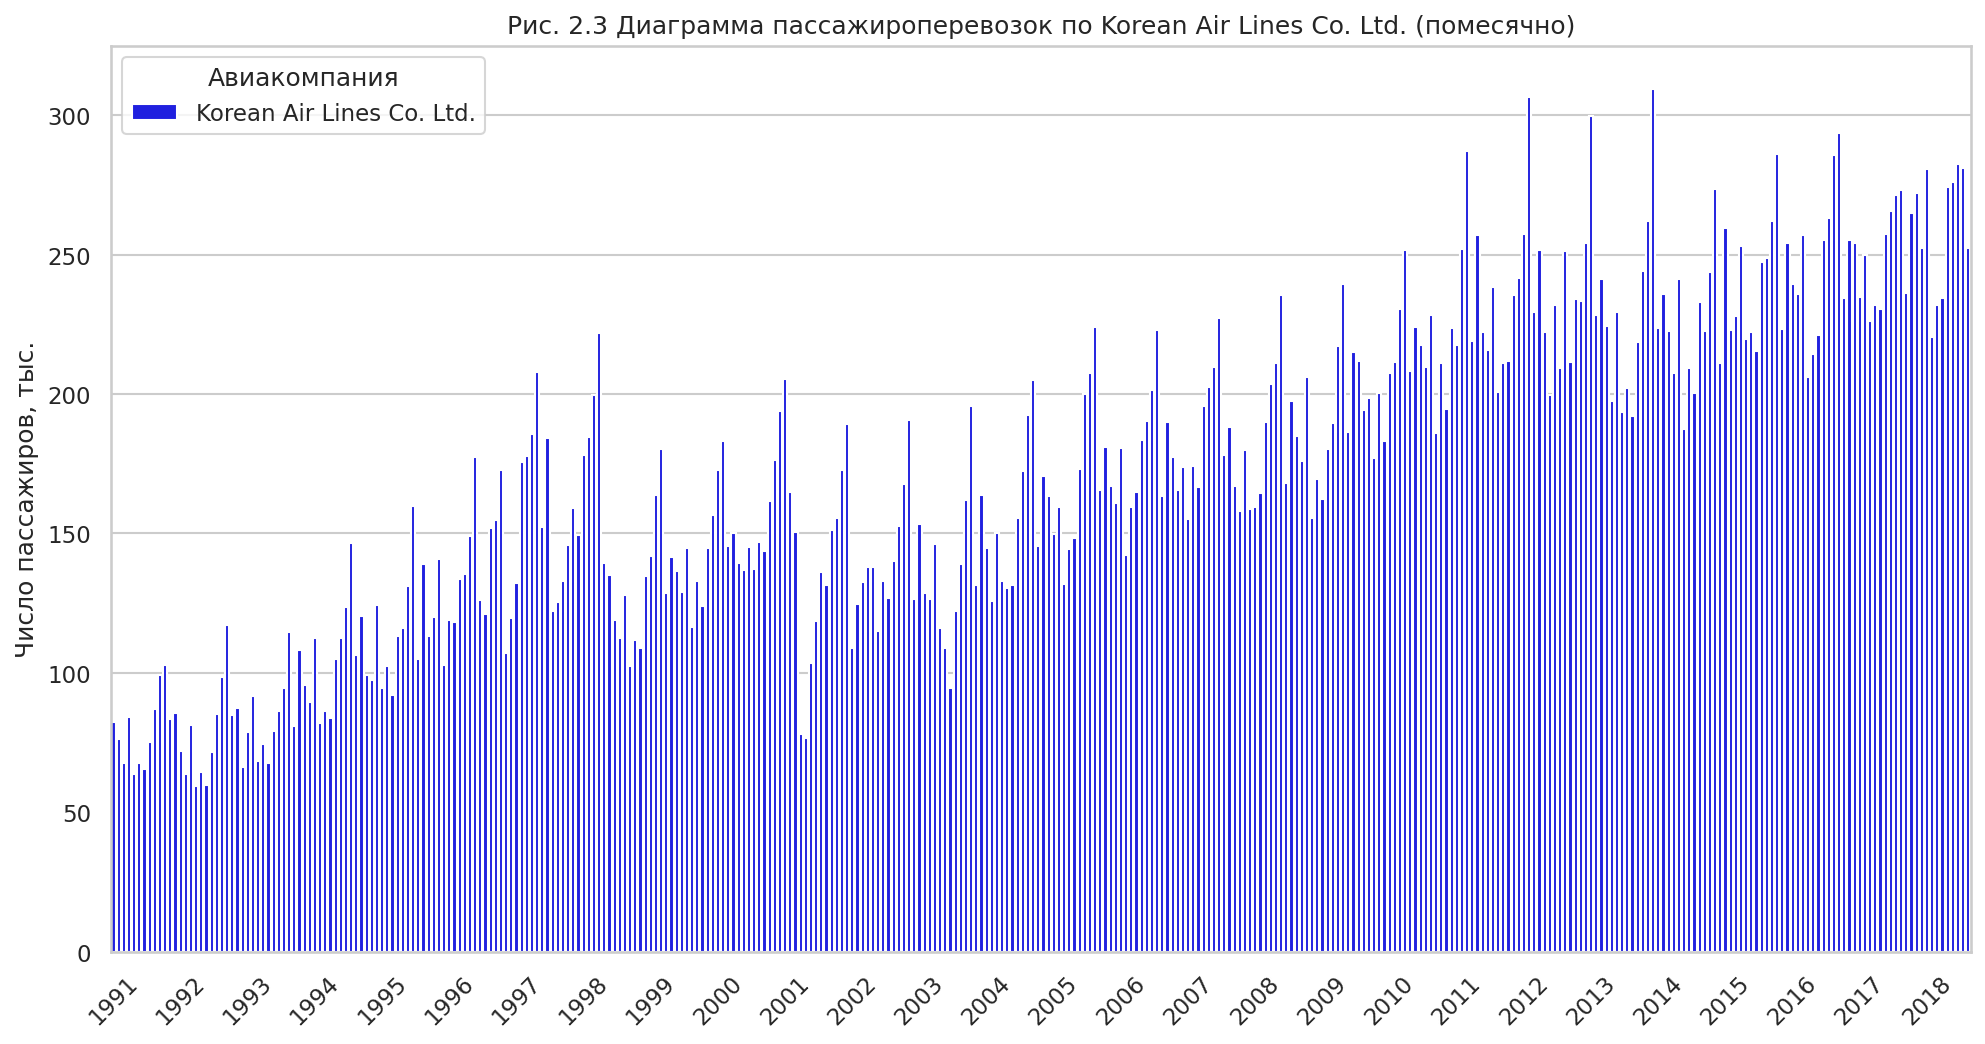

In [ ]:
#Соберём еще один Датасет с суммированными данными об объеме пассажироперевозок ПОМЕСЯЧНО

df2_2 = df_Not_2020.copy()
df2_2['Month_Year'] = df2_2['Year'].astype(str) +'_'+df2_2['Month'].astype(str)
df2_2 = df2_2[['Month_Year', 'carrier', 'Total']].groupby(['Month_Year', 'carrier'])\
.sum().sort_values(by=["carrier", 'Month_Year'], ascending=True)
df2_2.reset_index(inplace=True) 

# Добавим поле наименование авиакомпании для наглядности
df2_2 = df2_2.merge(airlines)[['carrier', 'AirCraft', 'Month_Year', 'Total']] 

#Создим подписи для оси Х, для нагляности
xlabels = []
for a in range(1991, 2020):
  xlabels.append(a)
  for b in range(1,13):
    xlabels.append('')

#Возьмём код максимально разстущей компании исходя из графиков на Рис 2.2 - 
#"KE" Korean Air Lines Co. Ltd. и построим по ней столбчатую диаграмму

ac_top = 'KE'
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')

gx = sns.barplot(data=df2_2.loc[df2_2['carrier']==ac_top], x='Month_Year', \
                 y='Total', hue = 'AirCraft', palette = ['blue'])
ylabels = ['{:.0f}'.format(x) for x in gx.get_yticks()/1000]
gx.set_yticklabels(ylabels)
gx.set_xticklabels(xlabels, rotation=45)
gx.set(title='Рис. 2.3 Диаграмма пассажироперевозок по '+airlines.loc[airlines['carrier']\
                  ==ac_top]['AirCraft'].values[0]+' (помесячно)')
gx.set(ylabel="Число пассажиров, тыс.",
       xlabel='')
plt.legend(title='Авиакомпания')
plt.show()

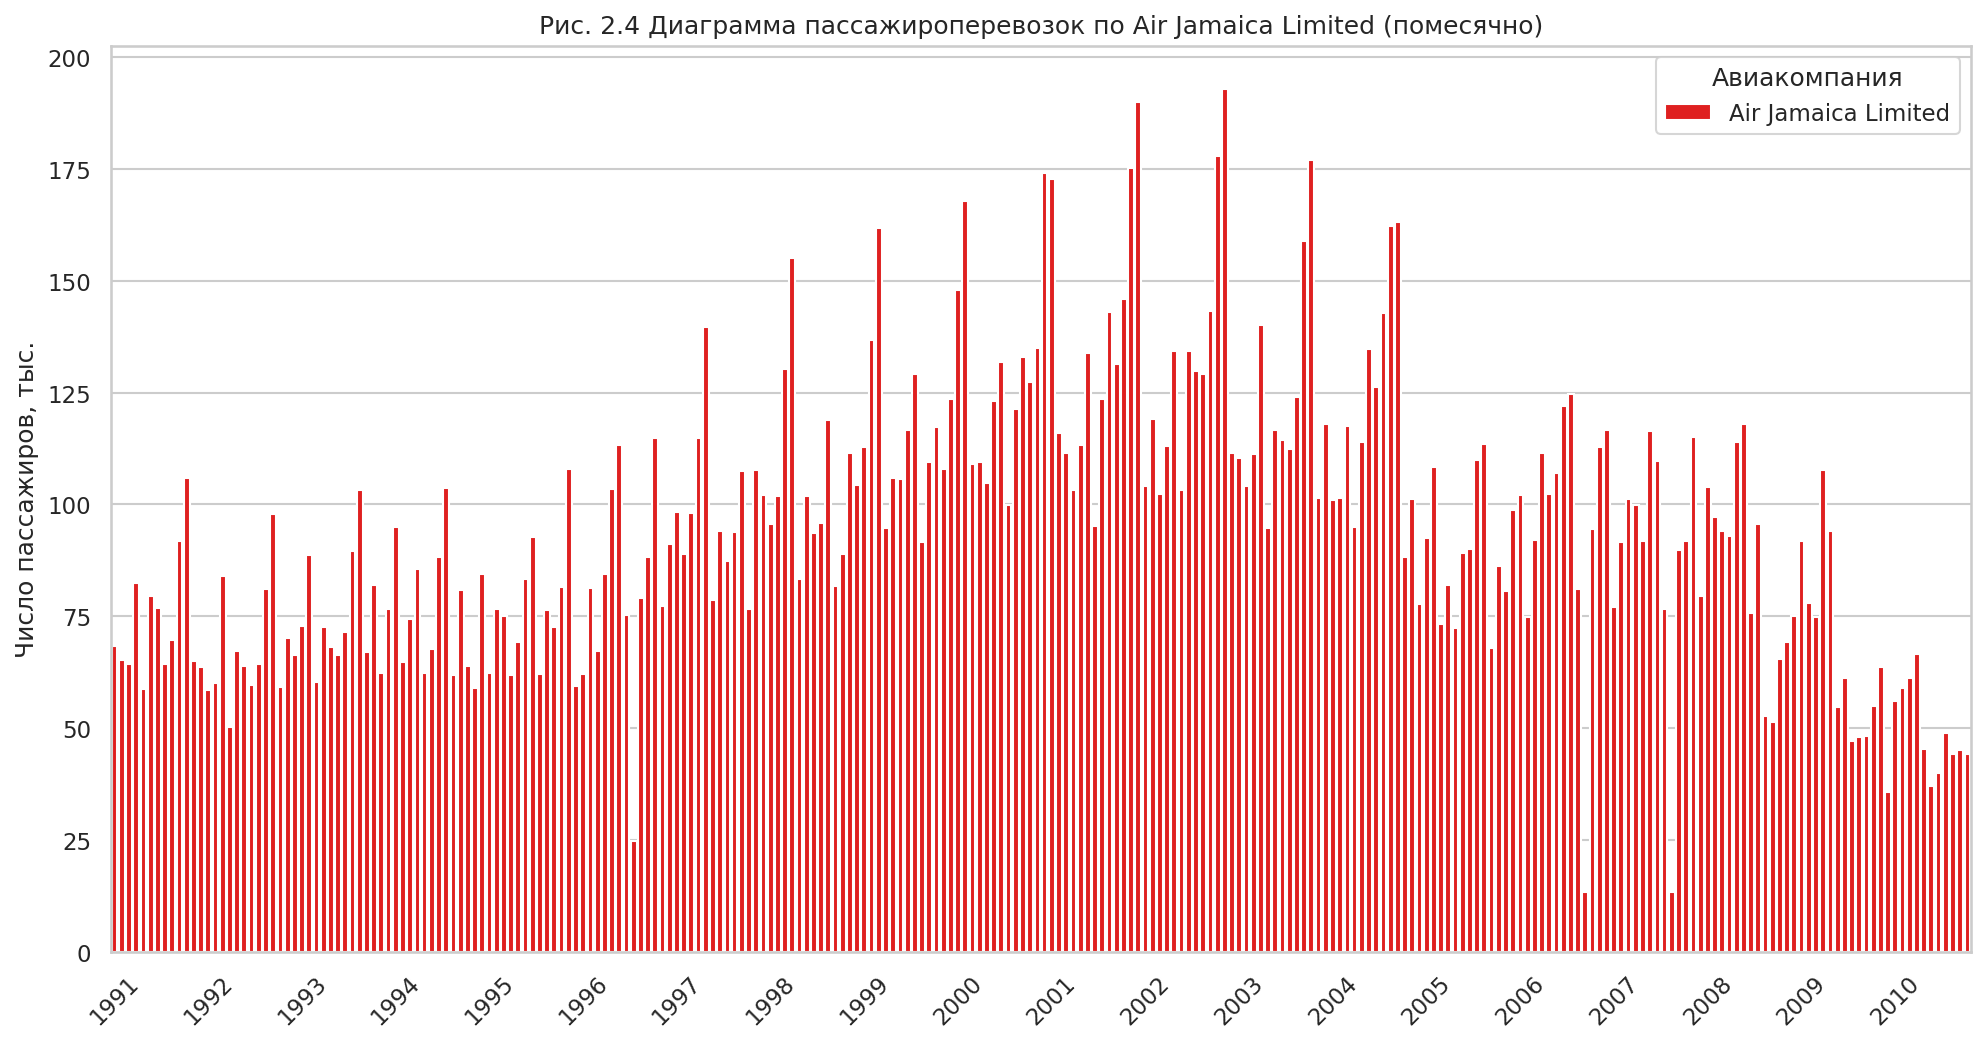

In [ ]:
#Возьмём код компании с самым заментным падением исходя из графиков на Рис 2.2 
#- "JM" Air Jamaica Limited и построим по ней столбчатую диаграмму

#Создим подписи для оси Х, для нагляности
xlabels = []
for a in range(1991, 2020):
  xlabels.append(a)
  for b in range(1,13):
    xlabels.append('')

ac_down = 'JM'
plt.figure(figsize=[16,8], dpi=150)
sns.set_theme(style='whitegrid')

gx = sns.barplot(data=df2_2.loc[df2_2['carrier']==ac_down], x='Month_Year',\
                 y='Total', hue = 'AirCraft',palette =  ['red'])
ylabels = ['{:.0f}'.format(x) for x in gx.get_yticks()/1000]
gx.set_yticklabels(ylabels)
gx.set_xticklabels(xlabels, rotation=45)
#gx.set(xticklabels=[])
gx.set(title='Рис. 2.4 Диаграмма пассажироперевозок по '+airlines.loc[airlines['carrier']\
                 ==ac_down]['AirCraft'].values[0]+' (помесячно)')
gx.set(ylabel="Число пассажиров, тыс.",
       xlabel="")
plt.legend(title='Авиакомпания')
plt.show()

**Выводы**: *Из графиков на Рис. 2.3 и 2.4 видно,  что "Korean Air Lines" - стабильно растет на всём периоде, а "Air Jamaica" - не смотря на рост до 2002 года, в последущие 8 лет заметно теряла клиентов, а после 2010 года данные о перевозках отсутвуют, из чего можно сделать вывод об отсутвии указанной компании на рынке. По обоим компаниям видно сезонное именение пассажирапотока в зависимости от месяца, а так же заметно несколько более крупных "провалов" связанных возможно как с общемировыми кризисами, так и "локальными" проблемами самих компаний.*

# Задание 3. Загруженность аэропортов

Вопрос 1: Нарисуйте топ 5 по загруженности аэропортов В США за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года. Для кодировки аэропортов используется код IATA (International Air Transport Association airport code).

Ответ:


Вопрос 2: Нарисуйте топ 5 популярных иностранных аэропортов (ВНЕ США) за все года (1990-2021). По оси Х на графике укажите код аэропорта + город, в котором он находится (город по коду придется найти в открытых источниках), по оси У - кол-во перевезенных людей за все года.

Ответ:

# Задание 4. Подробный анализ загруженности

Вопрос 1: Для каждого года выведите топ месяцев, в которых трафик был максимальным (постарайтесь визуализировать так, чтобы с первого взгляда график был понятен и читался "вне контекста")

Ответ:

Вопрос 2: Есть ли какие-то повторяющиеся месяцы, входящие в топ из года в год (или несколько лет подряд)? Если да, то какие для этого могут быть причины? Выдвиньте несколько гипотез.

Ответ:



Вопрос 3: Какое кол-во людей (в процентах) потеряли ТОП 5 **авиакомпаний** за период февраль-декабрь 2020 года, в сравнении с периодом февраль-декабрь 2019 года? Отобразите на графике. 

Ответ:

Вопрос 4: Предположим, что по предварительным рассчетам (на июнь 2019 года) план по перелетам на февраль-декабрь 2020 года был такой же как на февраль-декабрь 2019 года. Если так, то какие фактические убытки понесли ТОП 5 **авиакомпаний**, если чистая прибыль за 1 человека в среднем = 15$.

Ответ:

# Задание 5 (Дополнительно)
Здесь Вы можете поэксперементировать - провести собственный анализ, выдвинуть гипотезы относительно данных